In [3]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 233.7/233.7 kB 2.8 MB/s eta 0:00:00


In [4]:
# Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, 

# Libraries for data visualization
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy 
import statsmodels.api as sm

In [10]:
#load the dataset provided
df = pd.read_csv('adult.csv')

In [11]:
# salary dataset info to find columns and count of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [12]:
#replacing some special character columns names with proper names 
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

Data Cleaning:

In [13]:
#Finding the special characters in the data frame 
df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [14]:
# code will replace the special character to nan and then drop the columns 
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

In [15]:
#running a loop of value_counts of each column to find out unique values. 
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
89       1
87       1
86       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
120277    18
125892    18
113364    17
126569    17
          ..
152234     1
171301     1
257764     1
168312     1
257302     1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int

In [28]:
df.head()


,workclass,education,marital,occupation,relationship,race,gender,income
0,5,11,5,Machine-op-inspct,Own-child,0,0,0
1,5,3,2,Farming-fishing,Husband,3,0,0
2,4,9,2,Protective-serv,Husband,3,0,1
3,5,0,2,Machine-op-inspct,Husband,0,0,1
5,5,13,5,Other-service,Not-in-family,3,0,0


In [32]:
#occupation
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [40]:
df['occupation'] = df.occupation.replace({"Machine-op-inspct" : 6,
                          "Farming-fishing" : 2,
                          "Protective-serv" : 14,
                          "Other-service" : 13,
                          "Prof-specialty" : 5  ,
                          "Craft-repair" : 9   ,
                          "Adm-clerical" : 3,
                          "Exec-managerial" : 7,
                          "Tech-support" : 2,
                          "Sales"   : 10,
                          "Priv-house-serv" : 8,
                          "Transport-moving" : 11,
                          "Handlers-cleaners" : 4,
                          "Armed-Forces" : 12})

In [41]:
df

,workclass,education,marital,occupation,relationship,race,gender,income
0,5,11,5,1,Own-child,0,0,0
1,5,3,2,2,Husband,3,0,0
2,4,9,2,3,Husband,3,0,1
3,5,0,2,1,Husband,0,0,1
5,5,13,5,4,Not-in-family,3,0,0
...,...,...,...,...,...,...,...,...
48837,5,9,2,2,Wife,3,1,0
48838,5,3,2,1,Husband,3,0,1
48839,5,3,1,3,Unmarried,3,1,0
48840,5,3,5,3,Own-child,3,0,0


In [42]:
df['relationship'] = df.relationship.replace({"Not-in-family" : 0,
                          "Wife" : 1,
                          "Husband" : 4,
                          "Unmarried" : 3,
                          "Own-child" : 5  ,
                          "Other-relative" : 9   ,
                          })

In [43]:
df

,workclass,education,marital,occupation,relationship,race,gender,income
0,5,11,5,1,5,0,0,0
1,5,3,2,2,4,3,0,0
2,4,9,2,3,4,3,0,1
3,5,0,2,1,4,0,0,1
5,5,13,5,4,0,3,0,0
...,...,...,...,...,...,...,...,...
48837,5,9,2,2,1,3,1,0
48838,5,3,2,1,4,3,0,1
48839,5,3,1,3,3,3,1,0
48840,5,3,5,3,5,3,0,0


Data Visualization:

<AxesSubplot:xlabel='education'>

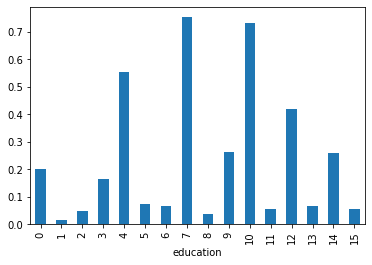

In [44]:
#plotting a bar graph for Education against Income to see the co-relation between these columns 
df.groupby('education').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

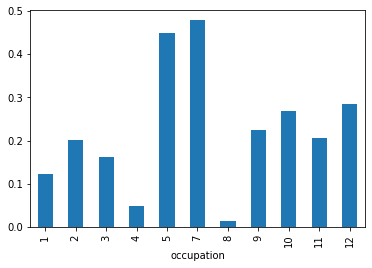

In [45]:

df.groupby('occupation').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='gender'>

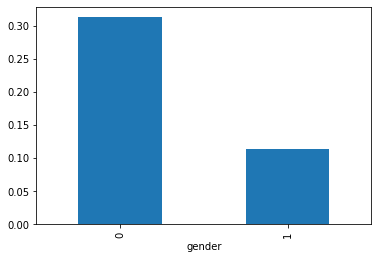

In [46]:
df.groupby('gender').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

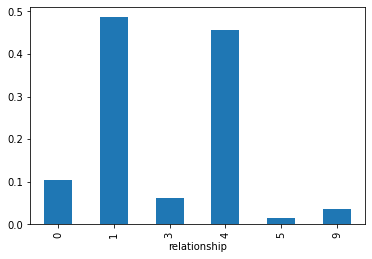

In [47]:
df.groupby('relationship').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='race'>

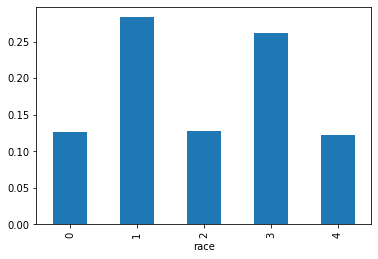

In [48]:
df.groupby('race').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

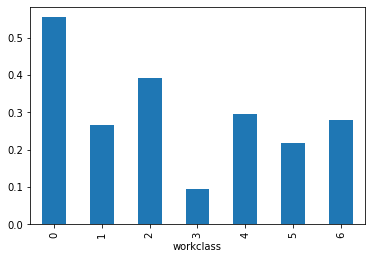

In [49]:
df.groupby('workclass').income.mean().plot(kind='bar')

Observations:

By these visualizations, we can deduce some correlations between our independent attributes and dependent attribute:

Adults with an educational background of Prof-school (7) and Doctorate (10) will have a better income and it is likely possible that their income is higher than 50K.

Our data suggest that people with occupation Prof-specialty (5) and Exec-managerial (7) will have a better chance of earning an income of more than 50K.

The gender bar chart provides us some useful insight into the data that Men (0) are more likely to have a higher income.

relationship chart shows us that wife (1) and husband (4) has a higher income. A married couple would most likely earn >50K.

As per the data, an Asian-Pac-Islander (1) or a white (3) have more chances of earning more than 50K.

Self-emp-in (0), Federal-gov(2) workclass groups have a higher chance of earning more than 50K.

# Model Selection:

We are provided with 48K rows of the labeled dataset tagged with the output column “income” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Classification problem. Based on these criteria we can narrow down our choice of models to a few:

Logistic Regression:

Identifying features:

In [50]:
#Transform the data set into a data frame
#X axis = We concatenate the Relationship, Education,Race,Occupation columns concate using np.c_ provided by the numpy library
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['gender'],df['marital'],df['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])
#Y axis = Our dependent variable or the income of adult i.e Income
df_y = pd.DataFrame(df.income)

Here we are dividing our data into a dependent feature that is income as df_y and independent features that are relationship, race, occupation, gender, marital, workclass as df_x.

Splitting Data:

In [51]:
#Initialize the linear regression model
reg = LogisticRegression()
#Split the data into 77% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

We start by calling the function LogisticRegression() from the scikit library and assigning it to a variable reg. Then we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.33 creates a test data set with 33% of the data we have and the remaining 77% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [52]:
#Train our model with the training data
reg.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = reg.predict(x_test)

C:\Users\SNEGHAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Then we train our model using .fit() function providing it with our train sets and get the output predictions using .predict() function by feeding test sets.

Prediction and Evaluation:

In [54]:
#feeding the predict function with our test values in the format 
[['relationship','education','race','occupation','gender','marital','workclass']]
reg.predict([[1,7,3,7,0,2,0]])

C:\Users\SNEGHAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

Accuracy Check:

In [55]:
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7542213883677298


we achieved an accuracy value of 76% which is good for any machine learning prediction model particularly for a classification regression problem.

Conclusion:
    
Finally! we successfully created a classification Machine Learning prediction model using Python and its powerful libraries which predicts whether a given adult’s income will be >50K or not.